In [88]:
### Import required libraries ###
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from geopy.geocoders import Nominatim
import dtale
#from autoviz.AutoViz_Class import AutoViz_Class
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
### Import data from the directory ###
os.chdir(r'C:\Users\274875\Desktop\HMIL_Big_Data\Data_Science\VCRM\VCRM sample data\VCRM sample data')
vcrm_df = pd.read_csv("test_parse_ad_pe_20210222.csv")

In [170]:
### We can use dtale library to get an overview/EDA of the vcrm data ###

dtale.show(vcrm_df)

In [ ]:
### EDA of the vcrm data using pandas profiling ###
## To generate pandas profile we will run below code ##
# Getting error on PC while running below code as data is huge #

profile = ProfileReport(vcrm_df, title="EDA of vcrm data",explorative=True)
profile.to_file("EDA of vcrm data.html")

In [150]:
### Function to use lat & long variables to create new features ###
## There is a limit to get location information by using geolocator, so it will give us an error after a while ##

geolocator = Nominatim(user_agent="geoapiExercises")
# Latitude & Longitude input 
Latitude = "22.57949444"

Longitude = "88.45987777"
  
location = geolocator.reverse(Latitude+","+Longitude) 
  
address = location.raw['address']
# traverse the data
shop = address.get('shop','')
road = address.get('road','')
suburb = address.get('suburd','')
town = address.get('town','')
county = address.get('county','')
state_district = address.get('state_district','')
state = address.get('state', '') 
country = address.get('country', '') 
zipcode = address.get('postcode','') 
print(shop,road,suburb,town,county,state_district,state,country,zipcode)

loc_shop = []
loc_road = []
loc_suburb = []
loc_town = []
loc_county = []
loc_state_district = []
loc_state = []
loc_country = []
loc_zipcode = []
#loc_lat_long = [[] for _ in range(9)]
def get_location(Latitude,Longitude):
    location = geolocator.reverse(str(Latitude)+","+str(Longitude))
    address = location.raw['address']
    shop = address.get('shop','')
    road = address.get('road','')
    suburb = address.get('suburd','')
    town = address.get('town','')
    county = address.get('county','')
    state_district = address.get('state_district','')
    state = address.get('state', '') 
    country = address.get('country', '') 
    zipcode = address.get('postcode','')
    loc_shop.append(shop)
    loc_road.append(road)
    loc_suburb.append(suburb)
    loc_town.append(town)
    loc_county.append(county)
    loc_state_district.append(state_district)
    loc_state.append(state)
    loc_country.append(country)
    loc_zipcode.append(zipcode)
    return loc_shop,loc_road,loc_suburb,loc_town,loc_county,loc_state_district,loc_state,loc_country,loc_zipcode

In [56]:
### check the column names in the data frame ###
vcrm_df.isnull().values.any()

True

In [57]:
### Check missing values in all columns ###
missing_df = pd.DataFrame(vcrm_df.isna().sum(axis=0))
missing_df.columns = ['missing_value']
missing_df['VCRM_cols'] = missing_df.index
missing_df.reset_index(drop=True, inplace=True)
#missing_df.reset_index()
#missing_df
miss_col_name = []
miss_val = []
for i in range(len(missing_df)):
    if missing_df['missing_value'][i] > 0:
        miss_col_name.append(missing_df['VCRM_cols'][i])
        miss_val.append(missing_df['missing_value'][i])

missing_df = pd.DataFrame(list(zip(miss_col_name, miss_val)), columns=['miss_col_name','miss_values'])
a = len(missing_df)
b = len(vcrm_df.columns)
Percentage_missing_columns = (a/b)*100
print(Percentage_missing_columns)
missing_df

10.305343511450381


,miss_col_name,miss_values
0,cgw4_cf_gway_astseatbeltind,100000
1,cgw4_cf_gway_astwdwstat,100000
2,cgw4_cf_gway_dedicateddrlstate,100000
3,cgw4_cf_gway_drvseatbeltind,100000
4,cgw4_cf_gway_drvunlockstate,100000
5,cgw4_cf_gway_drvwdwstat,100000
6,cgw4_cf_gway_imsbuzzer,100000
7,cgw4_cf_gway_memoryenable,100000
8,cgw4_cf_gway_memoryp1cmd,100000
9,cgw4_cf_gway_memoryp2cmd,100000


Data_Type
int64        3
float64    512
string       9
dtype: int64


<AxesSubplot:>

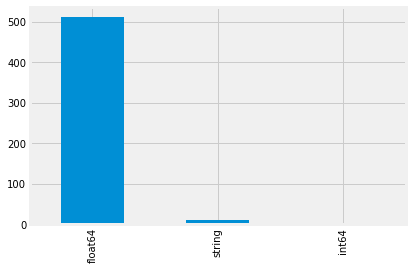

In [58]:
### Getting datatypes of each variable as a dataframe ###
vcrm_dtype_df = pd.DataFrame(vcrm_df.dtypes)
vcrm_dtype_df.columns = ['Data_Type']
vcrm_dtype_df['Column Name'] = vcrm_dtype_df.index
vcrm_dtype_df.reset_index(drop=True, inplace=True)
vcrm_dtype_df.head()
for i in range(len(vcrm_dtype_df)):
    if vcrm_dtype_df['Data_Type'][i] == object:
        vcrm_dtype_df['Data_Type'][i] = 'string'

vcrm_dtype_df.head()
#vcrm_dtype_df['Data Type'].apply(pd.value_counts).T.stack().plot(kind='bar')
print(vcrm_dtype_df.groupby('Data_Type').apply(len))
vcrm_dtype_df['Data_Type'].value_counts().plot(kind='bar')
#print(vcrm_dtype_df.dtypes.value_counts())

In [59]:
### Getting the min, max, mean & median value for each non string variables as a dataframe ###
#vcrm_dtype_df['Data_Type'] = vcrm_dtype_df['Data_Type'].astype('category')
vcrm_dtype_df = vcrm_dtype_df[vcrm_dtype_df.Data_Type != 'string']
min_val = []
max_val = []
mean = []
median = []
for i in vcrm_dtype_df['Column Name']:
    min_val.append(vcrm_df[i].min(skipna=True))
    max_val.append(vcrm_df[i].max(skipna=True))
    mean.append(vcrm_df[i].mean(skipna=True))
    median.append(vcrm_df[i].median(skipna=True))

vcrm_dtype_df['min_val'] = min_val
vcrm_dtype_df['max_val'] = max_val
vcrm_dtype_df['mean'] = mean
vcrm_dtype_df['median'] = median
vcrm_dtype_df.head(20)

,Data_Type,Column Name,min_val,max_val,mean,median
6,int64,ignoncounter,1.0,256.000000,103.594490,93.000000
9,int64,triplength,14.0,14598.000000,5219.593460,4165.000000
10,int64,t,0.0,14597.000000,2586.585310,1399.000000
11,float64,latitude,0.0,30.896147,21.616596,22.738217
12,float64,longitude,0.0,95.320564,79.124190,77.279494
13,float64,acu11_cf_acu_dtc,0.0,42240.000000,19542.606170,0.000000
14,float64,acu11_cf_acu_extofsab,0.0,2.000000,1.999540,2.000000
15,float64,acu11_cf_acu_fltstat,0.0,2.000000,1.514740,2.000000
16,float64,acu11_cf_acu_numofflt,0.0,3.000000,0.644540,0.000000
17,float64,acu11_cf_ods_idrcv,0.0,0.000000,0.000000,0.000000


In [60]:
### Number of rows per VIN as per fuel type ###

# vin_count = pd.DataFrame(vcrm_df['vin'].value_counts())
# vin_count.columns = ['vin_count']
# vin_count['VIN_NO'] = vin_count.index
# vin_count.reset_index(drop=True, inplace=True)
# print(vin_count.head(20))
vin_count = pd.crosstab(vcrm_df['vin'],vcrm_df['fuel'])
print(vin_count.head())
print("We have total {} VIN's in our sample data".format(len(vin_count['D'])))

fuel                  D  G
vin                       
MALD341BLLM016134  1683  0
MALD341BLLM016136  2404  0
MALD341BMLM016054   317  0
MALD341BMLM016183   707  0
MALD341BMLM016186  1573  0
We have total 57 VIN's in our sample data


In [61]:
### Total Fuel count in the vcrm dataframe ###
vcrm_df['fuel'].value_counts()

G    91222
D     8778
Name: fuel, dtype: int64

In [62]:
### Creating new features using lattitude and longitude data and using it for our analysis ###
vcrm_df_first_val = vcrm_df.groupby('vin').last()
for i, j in zip(vcrm_df_first_val['latitude'], vcrm_df_first_val['longitude']):
    get_location(i,j)
vcrm_df_first_val['loc_shop'] = loc_shop
vcrm_df_first_val['loc_road'] = loc_road
vcrm_df_first_val['loc_suburb'] = loc_suburb
vcrm_df_first_val['loc_town'] = loc_town
vcrm_df_first_val['loc_county'] = loc_county
vcrm_df_first_val['loc_state_district'] = loc_state_district
vcrm_df_first_val['loc_state'] = loc_state
vcrm_df_first_val['loc_country'] = loc_country
vcrm_df_first_val['loc_zipcode'] = loc_zipcode

In [82]:
vcrm_df_first_val = pd.read_csv('vcrm_df_first_val.csv')
vcrm_df_first_val_1 = vcrm_df.groupby('vin').last()
vcrm_df_first_val_1['vin'] = vcrm_df_first_val_1.index
vcrm_df_first_val_1.reset_index(drop=True, inplace=True)
vcrm_df_first_val['vin'] = vcrm_df_first_val_1['vin']
vcrm_df_first_val = vcrm_df_first_val[vcrm_df_first_val.columns[-10:]]
vcrm_df_first_val.to_csv('vcrm_df_first_val_1.csv', sep=',')

<AxesSubplot:>

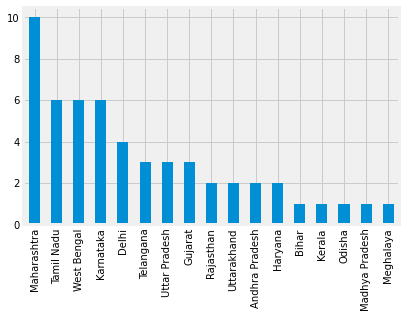

In [83]:
### Getting state level count for each VIN ###
vcrm_df_first_val['loc_state'].value_counts().plot(kind='bar')

<AxesSubplot:>

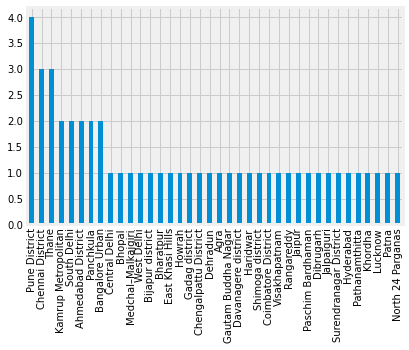

In [84]:
### Getting Distric level count for each VIN ###
vcrm_df_first_val['loc_state_district'].value_counts().plot(kind='bar')

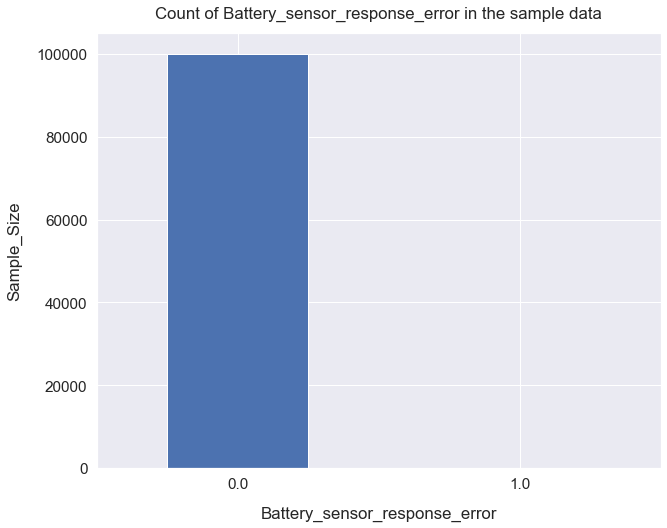

In [96]:
### We can get the plot at variable level using below snippet ### 
sns.set(font_scale=1.4)
vcrm_df['bat11_bat_snsr_error'].value_counts().plot(kind='bar', figsize=(9, 8), rot=0)
plt.xlabel("Battery_sensor_response_error", labelpad=14)
plt.ylabel("Sample_Size", labelpad=14)
plt.title("Count of Battery_sensor_response_error in the sample data", y=1.02);

In [118]:
### Finding the trip length of each VIN & save it as a csv or excel file ###
vcrm_df_Trip_length = vcrm_df[['triplength','vin','ignitiontime','ignofftime']]
vcrm_df_Trip_length = vcrm_df_Trip_length.groupby('triplength').last()
vcrm_df_Trip_length['triplength'] = vcrm_df_Trip_length.index
vcrm_df_Trip_length.reset_index(drop=True, inplace=True)
Trip_length_VIN = pd.DataFrame(vcrm_df_Trip_length.groupby('vin')['triplength'].sum())
Trip_length_VIN['trip_length_in_KMs'] = (Trip_length_VIN['triplength'])/1000
Trip_length_VIN.to_csv('Trip_length_VIN.csv', sep=',')

In [138]:
### Calculate total number of trips per VIN ###
number_of_trip_vin = pd.DataFrame(vcrm_df_Trip_length['vin'].value_counts())
number_of_trip_vin.columns = ['trips_per_vin']
number_of_trip_vin['vin'] = number_of_trip_vin.index
number_of_trip_vin.reset_index(drop=True, inplace=True)
merge_triplength_totaltrip_vin = pd.merge(left=Trip_length_VIN, right=number_of_trip_vin, left_on='vin', right_on='vin')

In [115]:
#pd.crosstab(vcrm_df_Trip_length['vin'],vcrm_df['fuel'])


In [154]:
### Function to get oulier count for each variable ###
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    num_outlier = ((df_in[col_name] < fence_low) | (df_in[col_name] < fence_low)).sum()
    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return num_outlier

In [167]:
### We have used "remove_outlier" function to get information at variable level ###
outlier_each_variable = []
for i in vcrm_dtype_df['Column Name']:
    out_lier = remove_outlier(vcrm_df, i)
    outlier_each_variable.append(out_lier)
vcrm_dtype_df['Total_outlier'] = outlier_each_variable
outliersum_per_variable = vcrm_dtype_df[['Column Name', 'Total_outlier']].copy()

In [169]:
### Save all important dataframes as an excel file for your analysis ###
writer = pd.ExcelWriter('VCRM_Data_Understanding_1.xlsx',engine='xlsxwriter')   # Creating Excel Writer Object from Pandas  
workbook=writer.book
missing_df.to_excel(writer,sheet_name='Missing Values',startrow=0 , startcol=0)   
vcrm_dtype_df.to_excel(writer,sheet_name='Summary',startrow=0 , startcol=0)
vin_count.to_excel(writer,sheet_name='Vin_vs_fuel',startrow=0 , startcol=0)
vcrm_df_first_val.to_excel(writer,sheet_name='Lat_Long',startrow=0 , startcol=0)
merge_triplength_totaltrip_vin.to_excel(writer,sheet_name='triplength_totaltrip',startrow=0 , startcol=0)
outliersum_per_variable.to_excel(writer,sheet_name='sumofoutlier_per_variable',startrow=0 , startcol=0)
writer.save()